In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf
from datetime import datetime
from scipy import stats
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math 
import warnings
warnings.filterwarnings('ignore')
import itertools

### Load Data 

In [2]:
#Customer Volumes data
customer_volumes = pd.read_excel('Data Challenge.xlsx', sheet_name='Customer Historical Volumes', engine='openpyxl')
#Cleaning the dates column
customer_volumes['Month'] = pd.to_datetime(customer_volumes['Month'], format='%Y%m')
print('historical_customer_volumes from {} to {}'.format(customer_volumes['Month'].min(), customer_volumes['Month'].max()))

historical_customer_volumes from 2011-01-01 00:00:00 to 2019-03-01 00:00:00


In [3]:
#Indexes Data
indexes = pd.read_excel('Data Challenge.xlsx', sheet_name='Indexes', engine='openpyxl').dropna(how='all', axis='columns')
#Cleaning the dates column
indexes['Month'] = pd.to_datetime(indexes['Month'], format='%Y%m')
print('indexes data from {} to {}'.format(indexes['Month'].min(), indexes['Month'].max()))

indexes data from 2011-01-01 00:00:00 to 2020-09-01 00:00:00


In [4]:
#Merge Data
df = pd.concat([customer_volumes,indexes],axis=1).dropna()
df = df.loc[:,~df.columns.duplicated()]
df

,Month,Customer Volumes,Type,IDX1,IDX2,IDX3
0,2011-01-01,908.0,Closed Month,92.690595,108.008014,101.2842
1,2011-02-01,986.0,Closed Month,97.914192,102.123691,101.3352
2,2011-03-01,1276.0,Closed Month,108.645217,101.238374,101.2392
3,2011-04-01,2066.0,Closed Month,116.243167,109.568848,100.9917
4,2011-05-01,1856.0,Closed Month,108.068513,110.511852,100.5940
...,...,...,...,...,...,...
94,2018-11-01,1629.0,Closed Month,62.316667,97.431685,100.9204
95,2018-12-01,1469.0,Closed Month,53.960000,94.062920,100.6184
96,2019-01-01,2336.0,Closed Month,56.583333,80.055366,100.4775
97,2019-02-01,2198.0,Closed Month,61.133333,69.545042,100.3547


In [5]:
df = df.set_index('Month')
df = df[['Customer Volumes','IDX1','IDX2','IDX3']]

### Quick Visualization

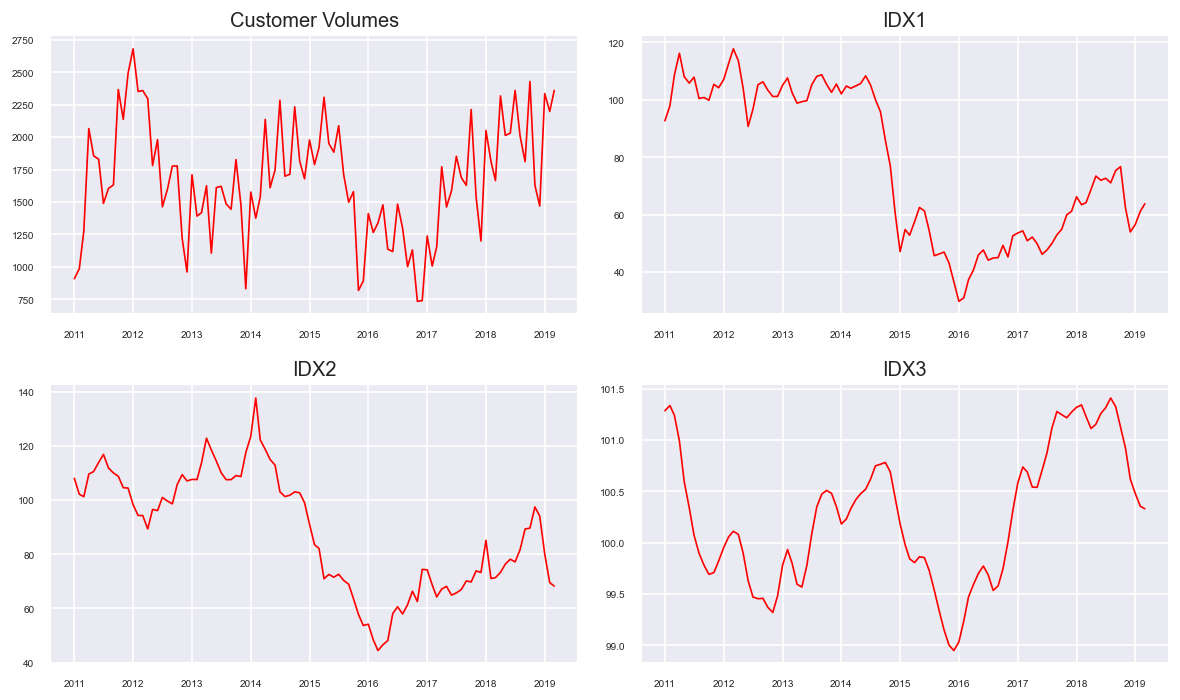

In [6]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

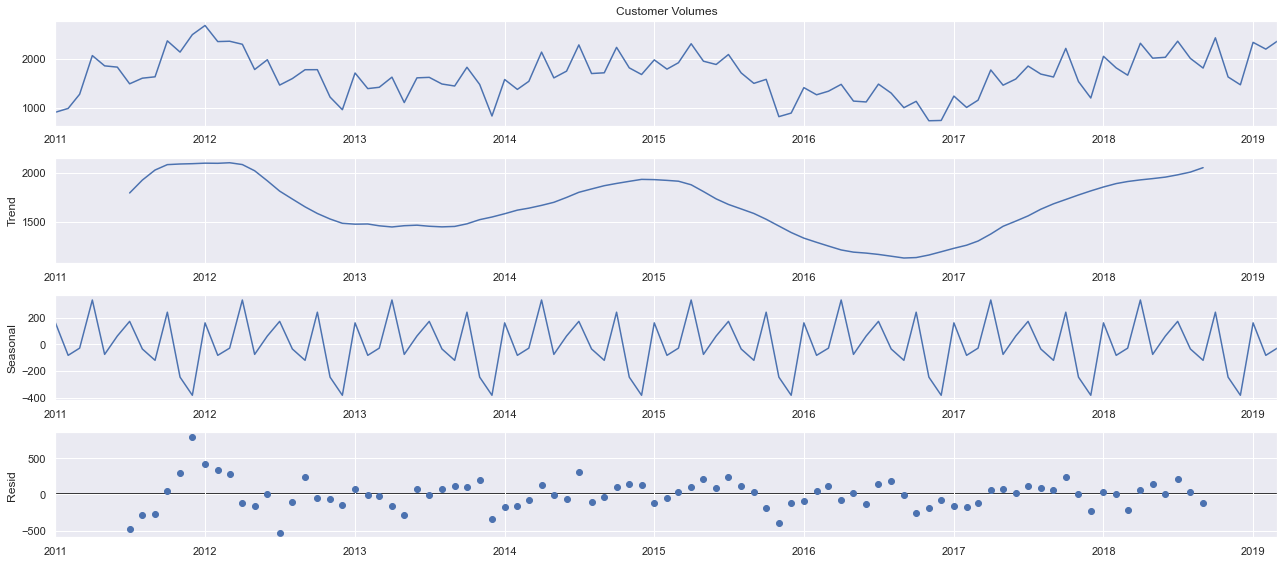

In [7]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df['Customer Volumes'], model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
#The plot above clearly shows that the customer volumes is unstable, 
# along with its obvious seasonality.

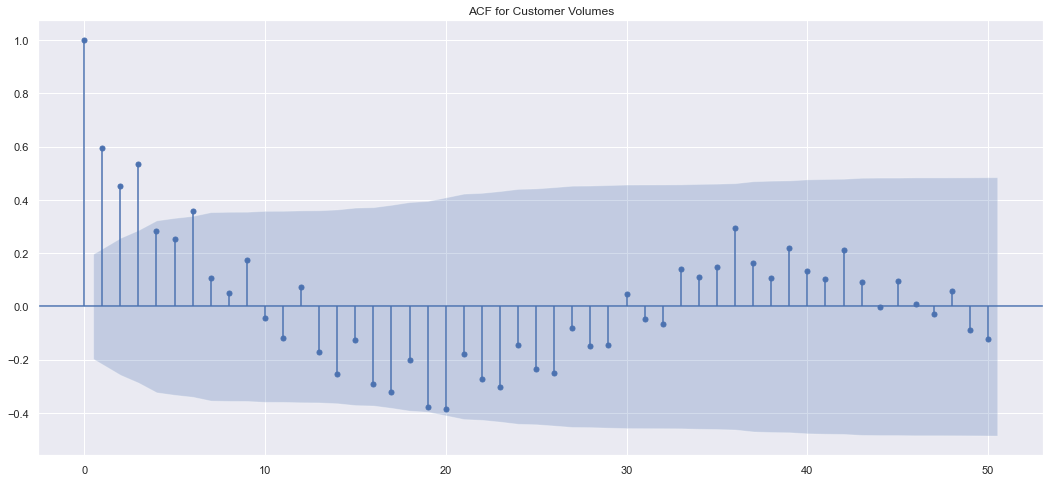

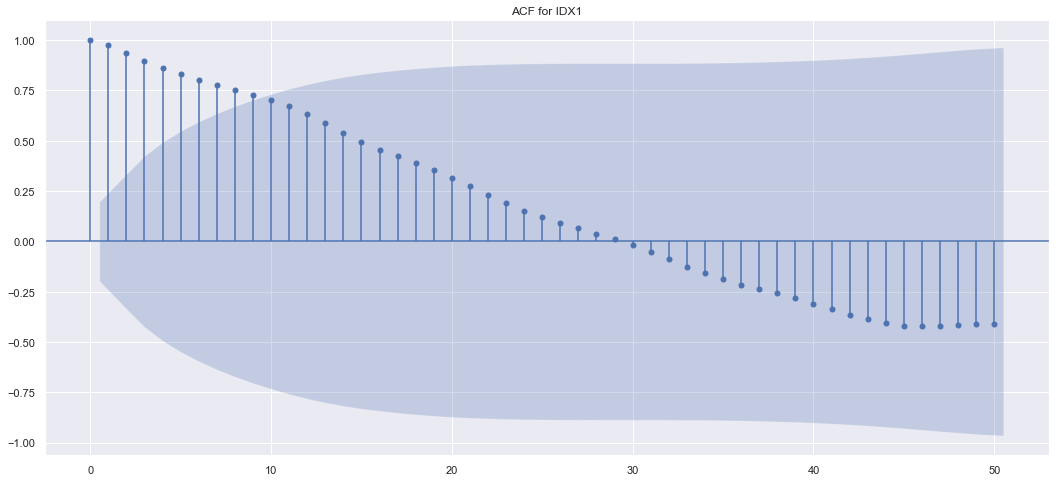

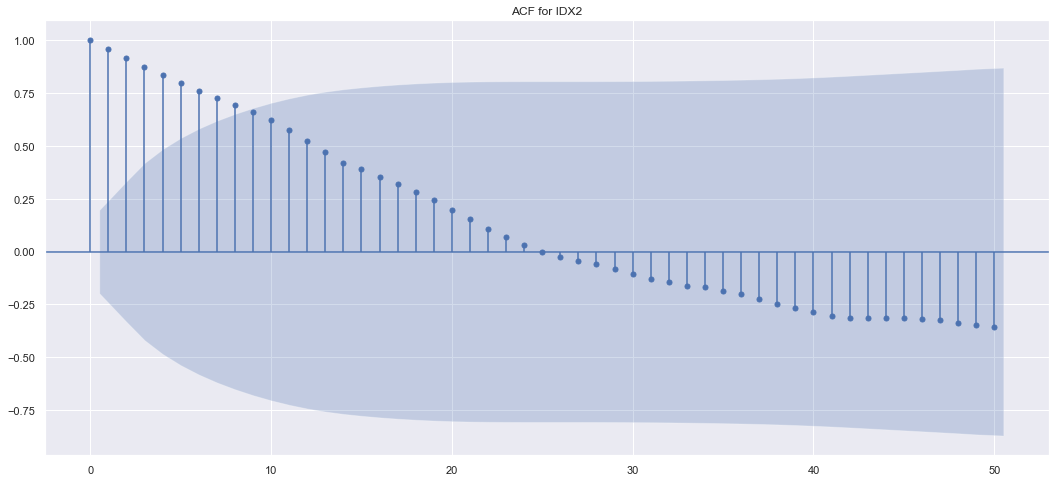

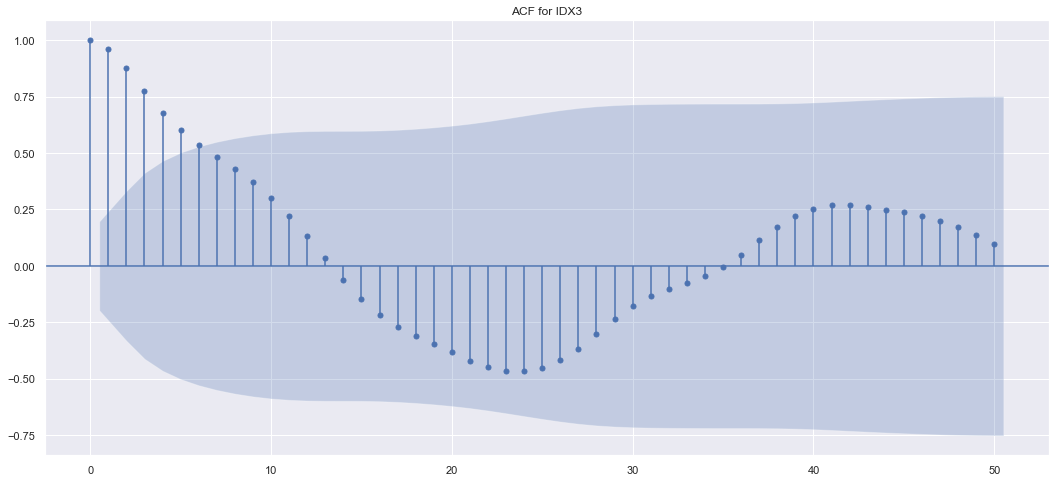

In [9]:
# plots the autocorrelation plots for each indexes at 50 lags
for i in df:
    plot_acf(df[i], lags = 50)
    plt.title('ACF for %s' % i)
    plt.show()

In [10]:
def DoLinePlot():
    #df = df.loc[df['Date'] >= StartYear].copy()
    data = df[[Series1,Series2]]
    #data = data.set_index('Month').resample('Q').mean()
    sns.set(font_scale=1.5)
    x = data.index
    y = data[Series1]
    y1 = data[Series2]
    fig, ax1 = plt.subplots(figsize = (15,7.5))
    ax2 = ax1.twinx()
    ax1.plot(x, y)
    ax2.plot(x, y1, color="red" )
    ax1.set_xlabel('Dateline')
    ax1.set_ylabel(Series1, color='b')
    ax2.set_ylabel(Series2, color='r')
    fig.autofmt_xdate()
    
    plt.show()

In [11]:
def DoLinePlot_wVLines():
    #df = df.loc[df['Date'] >= StartYear].copy()
    data = df[[Series1,Series2]]
    #data = data.set_index('Date').resample('Q').mean()
    sns.set(font_scale=1.5)
    x = data.index
    y = data[Series1]
    y1 = data[Series2]
    fig, ax1 = plt.subplots(figsize = (15,7.5))
    ax2 = ax1.twinx()
    ax1.plot(x, y)
    ax2.plot(x, y1, color="red" )
    ax1.set_xlabel('Dateline')
    ax1.set_ylabel(Series1, color='b')
    ax2.set_ylabel(Series2, color='r')
    fig.autofmt_xdate()
    
    plt.axvline(x = "2014-08-01", color='g')
    plt.axvline(x = "2015-04-01", color='g')
    plt.axvline(x = "2016-02-01", color='g')
    plt.axvline(x = "2017-01-01", color='g')
    
    plt.show()

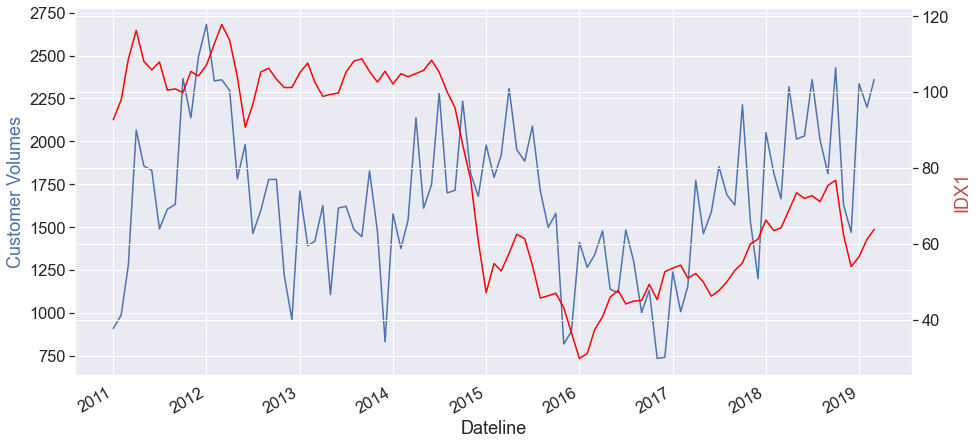

In [12]:
Series1 = "Customer Volumes"
Series2 = "IDX1"
#StartYear = "2011"
  
DoLinePlot()

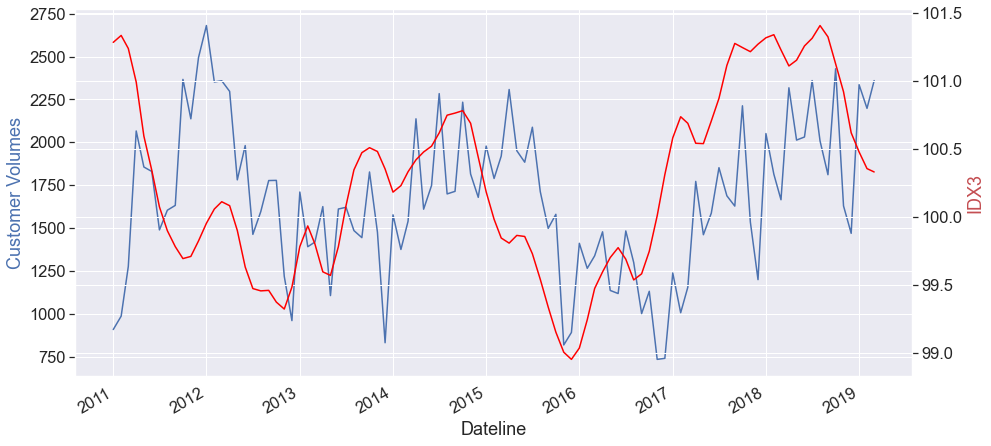

In [13]:
Series1 = "Customer Volumes"
Series2 = "IDX3"
#StartYear = "2011"
  
DoLinePlot()

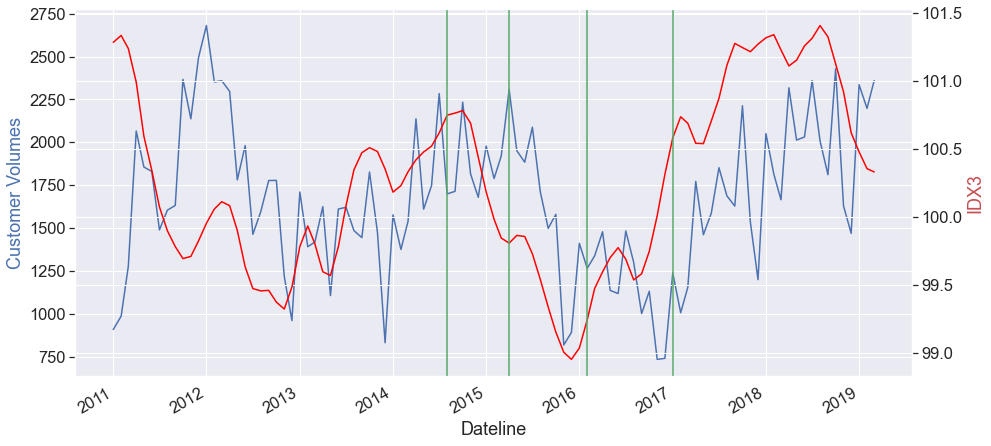

In [14]:
Series1 = "Customer Volumes"
Series2 = "IDX3"
#StartYear = "2011"
  
DoLinePlot_wVLines()

<AxesSubplot:xlabel='IDX1', ylabel='Customer Volumes'>

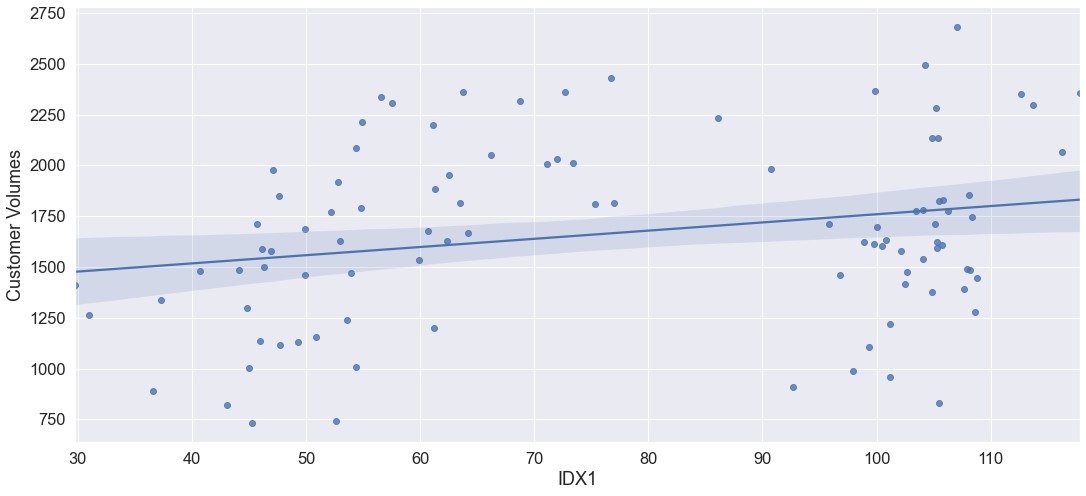

In [15]:

sns.regplot(x="IDX1", y="Customer Volumes", data=df)

<AxesSubplot:xlabel='IDX2', ylabel='Customer Volumes'>

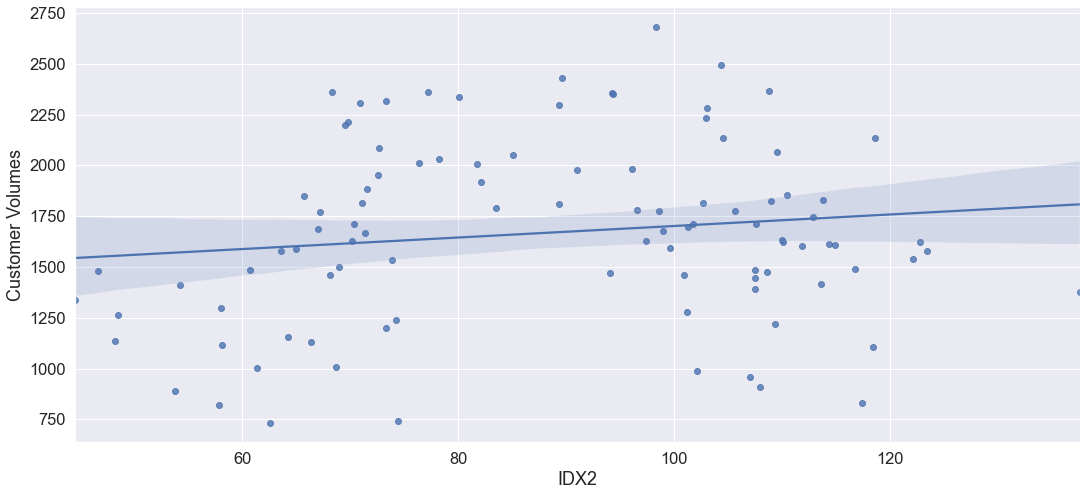

In [16]:
sns.regplot(x="IDX2", y="Customer Volumes", data=df)

<AxesSubplot:xlabel='IDX3', ylabel='Customer Volumes'>

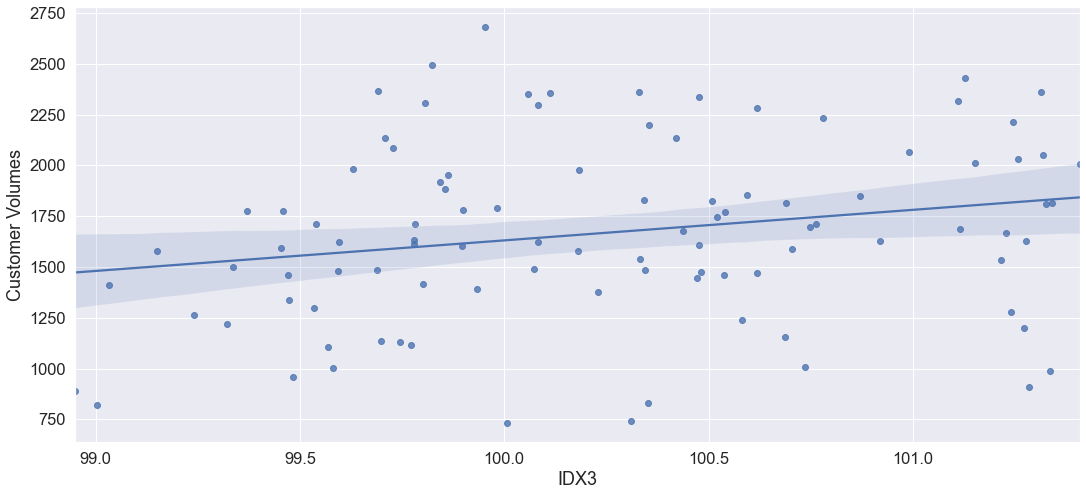

In [17]:
#optional 
sns.regplot(x="IDX3", y="Customer Volumes", data=df)

### Granger Causality test

In [52]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=18
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,Customer Volumes_x,IDX1_x,IDX2_x,IDX3_x
Customer Volumes_y,1.0000,0.0107,0.0127,0.0000
IDX1_y,0.0848,1.0000,0.0008,0.0079
IDX2_y,0.3681,0.0000,1.0000,0.0006
IDX3_y,0.0000,0.0000,0.0001,1.0000


### Cointegration Test

In [51]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Customer Volumes ::  38.02     > 40.1749   =>   False
IDX1   ::  17.31     > 24.2761   =>   False
IDX2   ::  4.59      > 12.3212   =>   False
IDX3   ::  0.1       > 4.1296    =>   False


### Split into Train and Test

In [53]:
n_obs=18

df_train, df_test = df[0:-n_obs], df[-n_obs:]
print(df_train.shape, df_test.shape)

(81, 4) (18, 4)


### ADF Staionary Test

In [54]:
### 1. ADF statistic less than several critical values
### 2. P-Value less than 0.05

In [55]:
# IDX1 & IDX2, p-value are all less than 0.05 alpha level, 
# we can reject the null hypothesis and derive that IDX1 and IDX2 time series are NOT stationary.
# Customer Volumes and IDX3 are staionary

In [56]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [57]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Customer Volumes" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1179
 No. Lags Chosen       = 12
 Critical value 1%     = -3.53
 Critical value 5%     = -2.905
 Critical value 10%    = -2.59
 => P-Value = 0.0253. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IDX1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1394
 No. Lags Chosen       = 1
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.6991. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "IDX2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Sta

###  First order difference transoform

In [58]:
df_differenced = df_train.diff().dropna()

In [59]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Customer Volumes" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9075
 No. Lags Chosen       = 11
 Critical value 1%     = -3.53
 Critical value 5%     = -2.905
 Critical value 10%    = -2.59
 => P-Value = 0.0445. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IDX1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1381
 No. Lags Chosen       = 0
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IDX2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

### Select the Order (P) of VAR model

In [60]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  13.679432622625907
BIC :  14.279292838440341
FPE :  873366.2972140478
HQIC:  13.919754977853673 

Lag Order = 2
AIC :  13.07510969793672
BIC :  14.162821464101146
FPE :  478896.23813956947
HQIC:  13.510540697367158 

Lag Order = 3
AIC :  13.016053324272278
BIC :  14.598882959809831
FPE :  455481.4732892269
HQIC:  13.649171273372236 

Lag Order = 4
AIC :  13.100139060436906
BIC :  15.185532049114151
FPE :  504293.42656884895
HQIC:  13.933562969442931 

Lag Order = 5
AIC :  13.214620467399099
BIC :  15.810207154559766
FPE :  583078.4663998093
HQIC:  14.251009729996927 

Lag Order = 6
AIC :  12.99260430653797
BIC :  16.106205783840903
FPE :  490460.3956582881
HQIC:  14.234658216351068 

Lag Order = 7
AIC :  13.128130419110553
BIC :  16.76776459956553
FPE :  605119.3224726525
HQIC:  14.578587500566606 

Lag Order = 8
AIC :  13.259232596386495
BIC :  17.433120481249265
FPE :  770011.513127204
HQIC:  14.920869723367627 

Lag Order = 9
AIC :  13.328277364984613
BIC :  18.

In [30]:
x = model.select_order(maxlags=15)
x.summary()

,AIC,BIC,FPE,HQIC
0,14.44,14.57,1.861e+06,14.49
1,13.74,14.39,9.294e+05,14.00
2,12.87,14.04*,3.897e+05,13.33
3,12.93,14.63,4.209e+05,13.60
4,12.94,15.16,4.359e+05,13.82
5,13.12,15.86,5.421e+05,14.21
6,13.25,16.51,6.549e+05,14.54
7,13.29,17.07,7.444e+05,14.79
8,13.17,17.48,7.514e+05,14.88
9,13.32,18.15,1.029e+06,15.23


### Train the VAR Model of Selected Order(p)

In [61]:
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     20:41:14
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.82154
Nobs:                     65.0000    HQIC:                   4.87978
Log likelihood:          -178.849    FPE:                    2839.79
AIC:                      1.65923    Det(Omega_mle):         201.121
--------------------------------------------------------------------
Results for equation Customer Volumes
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     -106.800795        52.610221           -2.030           0.042
L1.Customer Volumes          0.390079         0.247058            1.579           0.114
L1.IDX1              

### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [32]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_differenced.columns, out):
    print(col, ':', round(val, 2))


Customer Volumes : 1.94
IDX1 : 1.86
IDX2 : 1.91
IDX3 : 1.82


### Forecast VAR model using statsmodels

In [33]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-6.00000000e+01,  3.00666667e+00,  3.17843103e+00,
         1.61800000e-01],
       [ 5.85000000e+02,  1.97000000e+00, -3.87014732e-01,
        -3.04000000e-02],
       [-6.78000000e+02,  5.01333333e+00,  4.08782061e+00,
        -3.04000000e-02],
       [-3.36000000e+02,  1.25333333e+00, -5.83959152e-01,
         5.54000000e-02]])

In [34]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=n_obs)
df_forecast = pd.DataFrame(fc, index=df.index[-n_obs:], columns=df.columns + '_pred')
df_forecast

,Customer Volumes_pred,IDX1_pred,IDX2_pred,IDX3_pred
Month,,,,
2018-01-01,522.398407,-1.435067,2.098692,0.091777
2018-02-01,-285.418606,-2.321465,0.461764,0.075715
2018-03-01,-165.449456,-1.139098,1.346755,0.027638
2018-04-01,313.031189,-0.666877,1.034963,-0.013726
2018-05-01,-207.321938,0.612051,-0.500130,0.010440
2018-06-01,-32.641895,0.068841,-0.460872,0.017510
2018-07-01,229.893976,-1.024449,-0.185982,0.000185
2018-08-01,-179.628256,-0.323316,-0.300784,0.008811
2018-09-01,-34.596596,-0.374328,-0.095954,0.013492


In [36]:
def invert_transformation(df, pred):
    forecast = df_forecast.copy()
    columns = df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = df[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
df_results = invert_transformation(df_differenced, df_forecast)

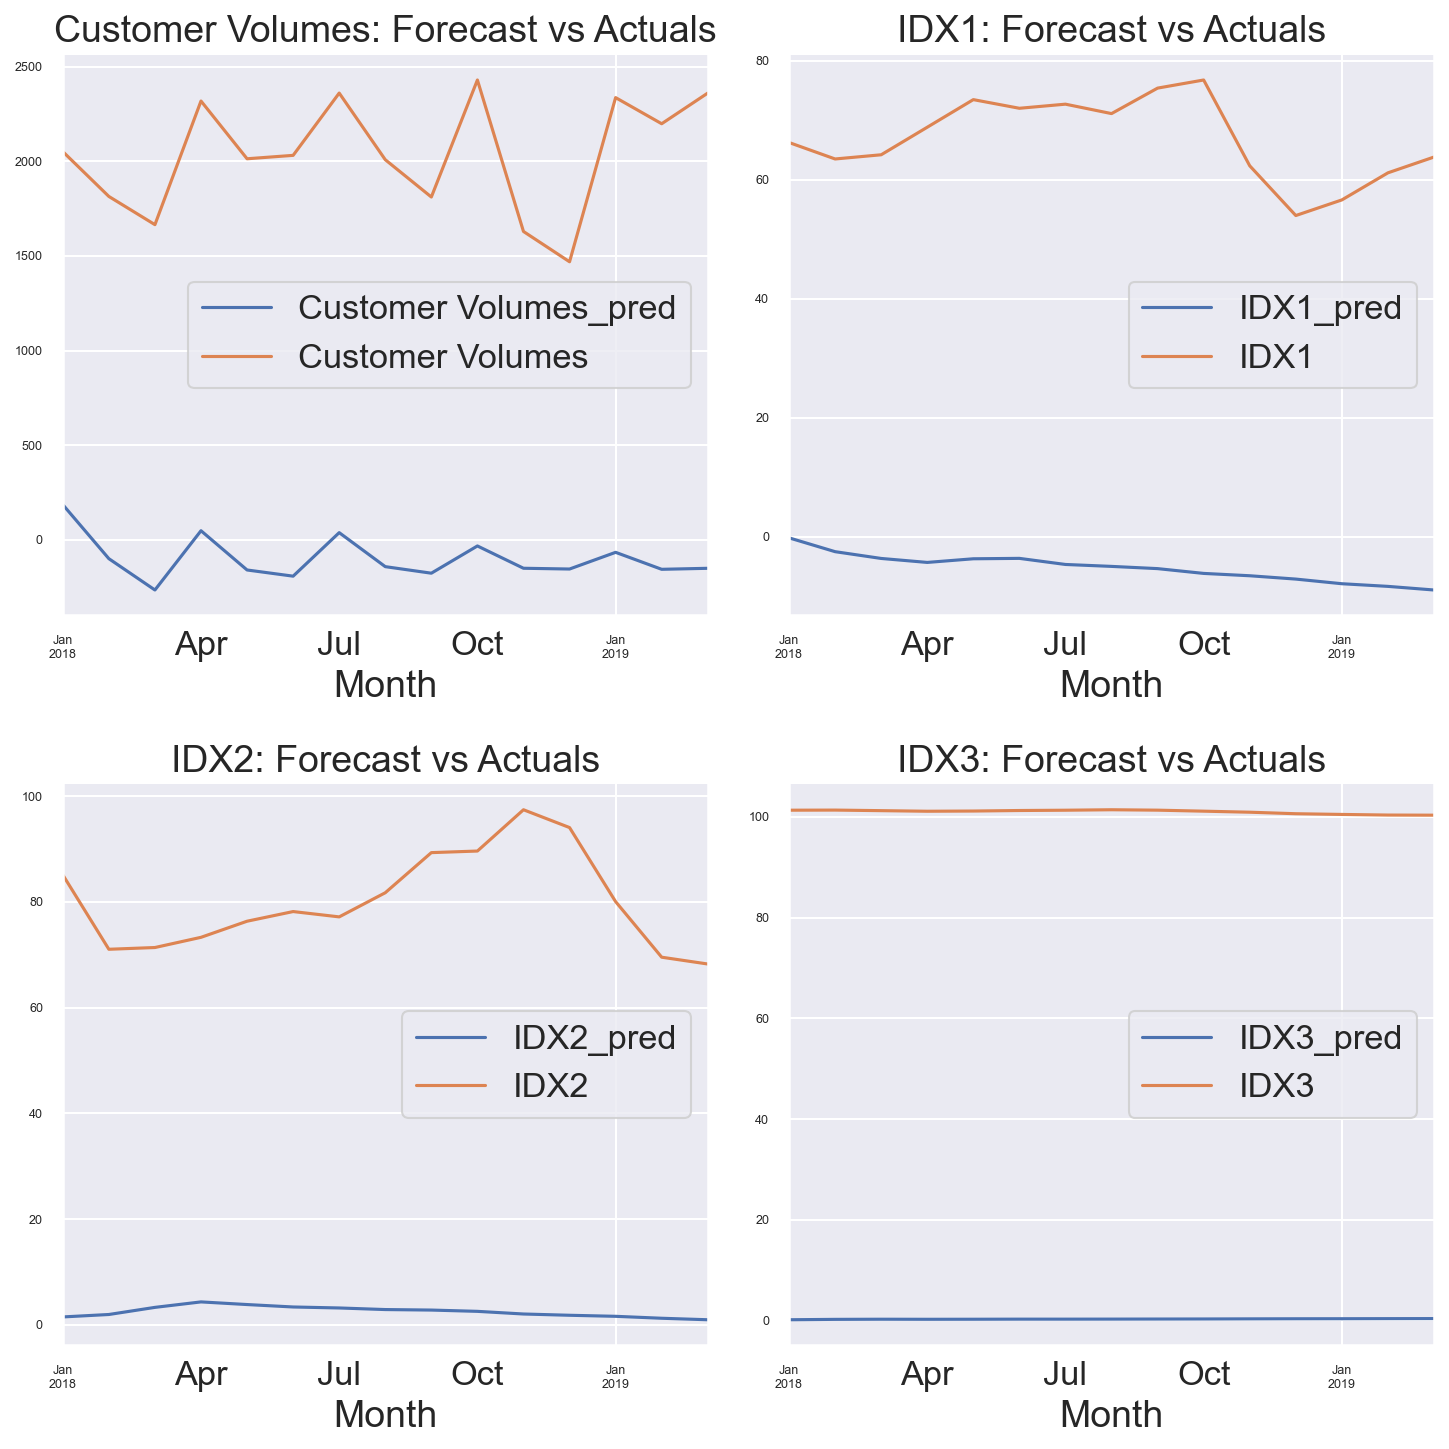

In [39]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_pred'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-n_obs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Evaluate

In [44]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

def adjust(val, length= 6): 
        return str(val).ljust(length)
print('Forecast Accuracy of: Customer Volumes')
accuracy_prod = forecast_accuracy(df_results['Customer Volumes_pred'].values, df_test['Customer Volumes'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: IDX1')
accuracy_prod = forecast_accuracy(df_results['IDX1_pred'].values, df_test['IDX1'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: IDX2')
accuracy_prod = forecast_accuracy(df_results['IDX2_pred'].values, df_test['IDX2'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: IDX3')
accuracy_prod = forecast_accuracy(df_results['IDX3_pred'].values, df_test['IDX3'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: Customer Volumes
mape   :  1.0532
me     :  -2130.3237
mae    :  2130.3237
mpe    :  -1.0532
rmse   :  2145.9621
corr   :  0.4795
minmax :  1.0532

Forecast Accuracy of: IDX1
mape   :  1.08
me     :  -71.9726
mae    :  71.9726
mpe    :  -1.08
rmse   :  72.2305
corr   :  0.3746
minmax :  1.08

Forecast Accuracy of: IDX2
mape   :  0.9682
me     :  -77.658
mae    :  77.658
mpe    :  -0.9682
rmse   :  78.1783
corr   :  -0.0813
minmax :  0.9682

Forecast Accuracy of: IDX3
mape   :  0.9972
me     :  -100.7353
mae    :  100.7353
mpe    :  -0.9972
rmse   :  100.7362
corr   :  -0.82
minmax :  0.9972
